In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
def plot_comparisons(x, y1, y2, y3, y4, y_label, save_loc, y1_err=None, y2_err=None, y3_err=None, y4_err=None):
    # create an index list for x-values
    x_values = range(len(x))
    y1 = np.array(y1)
    y2 = np.array(y2)
    y3 = np.array(y3)
    y4 = np.array(y4)

    fig, ax = plt.subplots()
    # add std err if over multiple seeds
    if y1_err is not None:
        y1_err = np.array(y1_err)
        y2_err = np.array(y2_err)
        y3_err = np.array(y3_err)
        y4_err = np.array(y4_err)
        ax.fill_between(x_values, y1-y1_err, y1+y1_err, color='black', alpha=0.1)
        ax.fill_between(x_values, y2-y2_err, y2+y2_err, color='green', alpha=0.05)
        ax.fill_between(x_values, y3-y3_err, y3+y3_err, color='deeppink', alpha=0.1)
        ax.fill_between(x_values, y4-y4_err, y4+y4_err, color='cornflowerblue', alpha=0.05)
    ax.plot(x_values, y1, marker='o', color='black', label='RLHF')
    ax.plot(x_values, y2, marker='o', color='green', label='Feature Preference')
    ax.plot(x_values, y3, marker='o', color='deeppink', label='Feature Preference+Prag (Ours)')
    ax.plot(x_values, y4, marker='o', color='cornflowerblue', label='RLHF+Prag')

    # set x-ticks to be the comparison values
    ax.set_xticks(x_values)
    ax.set_xticklabels(x)
    ax.yaxis.set_ticks(np.arange(0.5, 1.05, 0.1))

    ax.set_xlabel('Number of Comparisons')
    ax.set_ylabel(y_label)
    ax.set_ylim(ymin=0.5)
    ax.legend(loc='lower right')
    plt.savefig(save_loc + '/0' + y_label + '_comparisons.pdf')

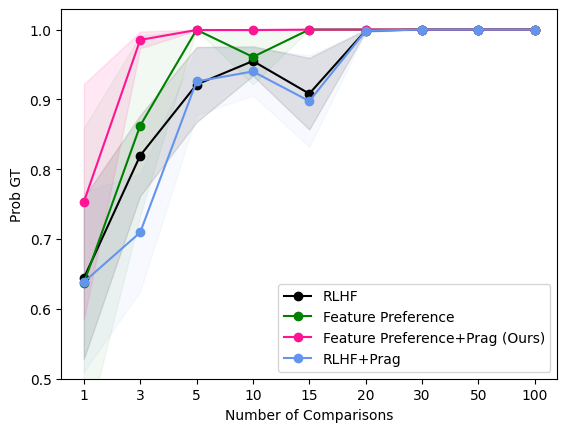

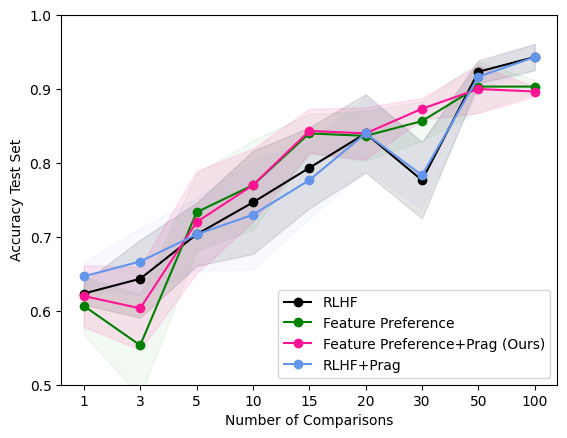

In [9]:
# PLOT SIMULATED COMPARISONS (MUSHROOMS) dense
comparisons = [1,3,5,10,15,20,30,50,100]

rlhf_probs = [0.6439482222000759, 0.8195451100667317, 0.9212333957354228, 0.9549499253431956, 0.9081301391124725, 0.9983899394671122, 0.9999663631121317, 0.999932199716568, 0.9999752640724182]
rlhf_probs_err = [0.11564983118864926, 0.05777815610259067, 0.0538210101608542, 0.0210661455022498, 0.051248145840885044, 0.001313188525698439, 2.2554115842677503e-05, 4.139030703648572e-05, 7.5470753332292515e-06]
rlhf_correct = [0.6233333333333333, 0.6433333333333333, 0.7033333333333333, 0.7466666666666667, 0.7933333333333334, 0.8399999999999999, 0.7766666666666666, 0.9233333333333333, 0.9433333333333334]
rlhf_correct_err = [0.014880338717125846, 0.0527571879166064, 0.04256900888458556, 0.06971026143525867, 0.054614727297406636, 0.053094010767585006, 0.05157402325197681, 0.015485837703548633, 0.017792006943442892]
featureprefs_probs = [0.6369562732676665, 0.8624463478724161, 0.9996242523193359, 0.9607845942179363, 0.999999741713206, 1.0, 1.0, 1.0, 1.0]
featureprefs_probs_err = [0.22199182189283106, 0.12884906483720465, 0.00032756711614509296, 0.03919955198343819, 2.016403588670933e-07, 0.0, 0.0, 0.0, 0.0]
featureprefs_correct = [0.6066666666666667, 0.5533333333333333, 0.7333333333333334, 0.77, 0.8400000000000001, 0.8366666666666667, 0.8566666666666667, 0.9033333333333333, 0.9033333333333333]
featureprefs_correct_err = [0.03917863649002878, 0.06888237161291583, 0.0523890521171374, 0.0604145188432738, 0.026457513110645915, 0.034037008503093276, 0.026548167396682205, 0.03414999332799468, 0.0091068360252296]
featureprefshuman_probs = [0.7531476318836212, 0.985180675983429, 0.9993581970532734, 0.9993072748184204, 0.9998632967472076, 1.0, 1.0, 1.0, 1.0]
featureprefshuman_probs_err = [0.16864564773989404, 0.011972821479179111, 0.0006237217613609006, 0.0006276268651539097, 0.00013661385557868228, 0.0, 0.0, 0.0, 0.0]
featureprefshuman_correct = [0.6200000000000001, 0.6033333333333333, 0.7200000000000001, 0.77, 0.8433333333333333, 0.84, 0.8733333333333333, 0.8999999999999999, 0.8966666666666667]
featureprefshuman_cor_err = [0.04164581897593192, 0.05608482783503119, 0.06928203230275508, 0.049370921238870095, 0.029804915461655056, 0.03516611478423585, 0.01459267372877821, 0.03236366537845386, 0.006666666666666672]
rlhfhuman_probs = [0.6384464899698894, 0.7094576696554819, 0.9257170557975769, 0.9399621983369191, 0.8975355923175812, 0.9980758726596832, 0.9999811053276062, 0.9999403258164724, 0.9999404549598694]
rlhfhuman_probs_err = [0.12884363357501405, 0.0841361929928317, 0.048237559504745675, 0.03423851551321798, 0.06539171985647418, 0.0017444786087749138, 1.0667586619256858e-05, 3.2995461298296794e-05, 3.056275817429335e-05]
rlhfhuman_correct = [0.6466666666666665, 0.6666666666666665, 0.7033333333333334, 0.73, 0.7766666666666666, 0.8400000000000001, 0.7833333333333334, 0.9166666666666667, 0.9433333333333334]
rlhfhuman_cor_err = [0.018685170918213298, 0.04507292310040157, 0.04911848145625363, 0.0741394940684457, 0.05164809223066905, 0.049999999999999996, 0.045441989885229905, 0.01763834207376394, 0.01763834207376394]

save_loc = '../results/sim_mushrooms/dense'
plot_comparisons(comparisons, rlhf_probs, featureprefs_probs, featureprefshuman_probs, rlhfhuman_probs, 'Prob GT', save_loc, rlhf_probs_err, featureprefs_probs_err, featureprefshuman_probs_err, rlhfhuman_probs_err)
plot_comparisons(comparisons, rlhf_correct, featureprefs_correct, featureprefshuman_correct, rlhfhuman_correct, 'Accuracy Test Set', save_loc, rlhf_correct_err, featureprefs_correct_err, featureprefshuman_cor_err, rlhfhuman_cor_err)


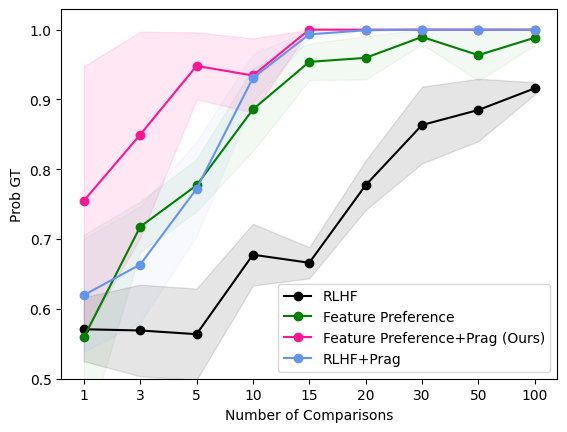

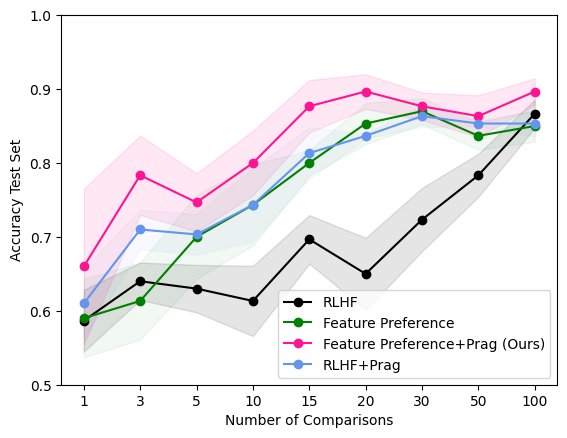

In [10]:
# PLOT SIMULATED COMPARISONS (MUSHROOMS) 1feat
comparisons = [1,3,5,10,15,20,30,50,100]

rlhf_probs = [0.570868716098685, 0.5691113699488188, 0.5638122108952743, 0.6776313899916601, 0.666094864512933, 0.7771999919151076, 0.8634099453056565, 0.8849326749019253, 0.9159503005986679]
rlhf_probs_err = [0.045844748441753555, 0.0655862006978311, 0.06533536828429556, 0.04429426172613893, 0.022356870844996497, 0.03546695641382233, 0.054981470090975905, 0.0447303330945991, 0.00871419576754539]
rlhf_correct = [0.5866666666666667, 0.64, 0.63, 0.6133333333333333, 0.6966666666666667, 0.6499999999999999, 0.7233333333333333, 0.7833333333333332, 0.8666666666666667]
rlhf_correct_err = [0.04181417238471041, 0.02527525231651948, 0.03214550253664318, 0.0475647588986155, 0.03291359439028341, 0.048755887585385835, 0.04280445685799976, 0.029185347457556448, 0.01910683602522961]
featureprefs_probs = [0.5591199777239328, 0.7176492644767863, 0.7769836299528601, 0.8857761715632699, 0.953863672917231, 0.9595851843185124, 0.9895767271007694, 0.9634865566168941, 0.9884618946717763]
featureprefs_probs_err = [0.1471904561742998, 0.036217592230323004, 0.03741339105491499, 0.059398812989837575, 0.026187657119963494, 0.031084570780696662, 0.010423259544122002, 0.03650122287411099, 0.010964163405028676]
featureprefs_correct = [0.5900000000000001, 0.6133333333333333, 0.7000000000000001, 0.7433333333333333, 0.8, 0.8533333333333333, 0.87, 0.8366666666666668, 0.8500000000000001]
featureprefs_correct_err = [0.053134641288521293, 0.05220084679281463, 0.05708681426114792, 0.05488033871712584, 0.01732050807568879, 0.02763834207376393, 0.01763834207376392, 0.018819171036881972, 0.021196329811802243]
featureprefshuman_probs = [0.7549315324020458, 0.8495221387873213, 0.9481006768790581, 0.9343521218440278, 0.9999998042204088, 1.0, 1.0, 1.0, 1.0]
featureprefshuman_probs_err = [0.19260066846615723, 0.1474473845566291, 0.04807208929258884, 0.0530289068267124, 1.957795911130174e-07, 0.0, 0.0, 0.0, 0.0]
featureprefshuman_correct = [0.6599999999999999, 0.7833333333333334, 0.7466666666666667, 0.8, 0.8766666666666667, 0.8966666666666667, 0.8766666666666667, 0.8633333333333333, 0.8966666666666666]
featureprefshuman_cor_err = [0.10517841234638987, 0.05364618600064834, 0.039388846087973224, 0.04362019273325046, 0.03548583770354864, 0.02341184476566019, 0.018608585649852804, 0.028213672050459177, 0.017792006943442885]
rlhfhuman_probs = [0.6196908360656035, 0.6635286025210828, 0.7719326247682905, 0.9308616249650092, 0.9932614813452723, 0.9991430490800219, 0.9999998895392661, 0.9999982475089766, 0.9999758772889283]
rlhfhuman_probs_err = [0.08092106626988996, 0.08317348009392142, 0.0677199792396655, 0.03429253135582267, 0.005901720085902252, 0.0008271359368474011, 5.82549517028591e-08, 4.648581817046215e-07, 2.826466043694513e-06]
rlhfhuman_correct = [0.61, 0.71, 0.7033333333333334, 0.7433333333333334, 0.8133333333333332, 0.8366666666666667, 0.8633333333333333, 0.8533333333333333, 0.8533333333333333]
rlhfhuman_cor_err = [0.04727417310530723, 0.02666666666666668, 0.027370341836426604, 0.0494961926726537, 0.03488033871712585, 0.003333333333333336, 0.01459267372877824, 0.0033333333333333184, 0.01779200694344289]
save_loc = '../results/sim_mushrooms/1feat'
plot_comparisons(comparisons, rlhf_probs, featureprefs_probs, featureprefshuman_probs, rlhfhuman_probs, 'Prob GT', save_loc, rlhf_probs_err, featureprefs_probs_err, featureprefshuman_probs_err, rlhfhuman_probs_err)
plot_comparisons(comparisons, rlhf_correct, featureprefs_correct, featureprefshuman_correct, rlhfhuman_correct, 'Accuracy Test Set', save_loc, rlhf_correct_err, featureprefs_correct_err, featureprefshuman_cor_err, rlhfhuman_cor_err)


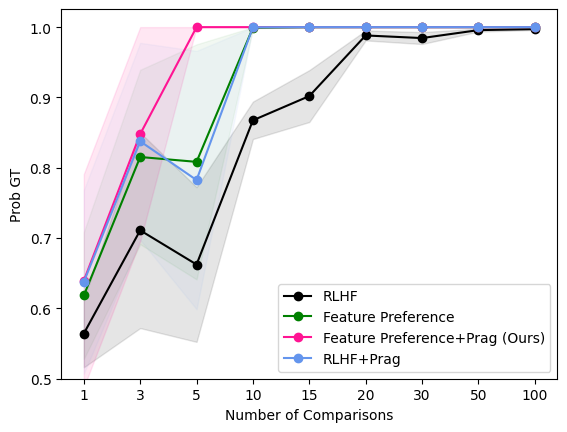

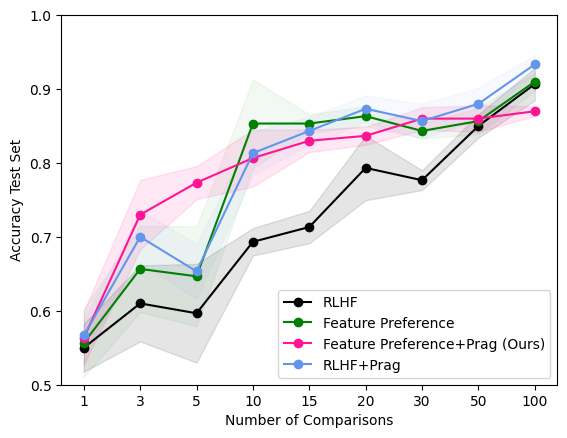

In [11]:
# PLOT SIMULATED COMPARISONS (MUSHROOMS) 3feat
comparisons = [1,3,5,10,15,20,30,50,100]

rlhf_probs = [0.5642793639390556, 0.7110161349683265, 0.6624139911368674, 0.8674767879240307, 0.9019460280736287, 0.9881563977694806, 0.9844481177903988, 0.9957301031660151, 0.9971732511932467]
rlhf_probs_err = [0.04800296687878012, 0.13900437619403883, 0.11000485347775767, 0.026607588924102123, 0.03690401197306897, 0.007052224671705068, 0.008480551278829828, 0.00208949167256928, 0.0011946818571648573]
rlhf_correct = [0.55, 0.6100000000000001, 0.5966666666666667, 0.6933333333333334, 0.7133333333333333, 0.7933333333333333, 0.7766666666666666, 0.85, 0.9066666666666667]
rlhf_correct_err = [0.03236366537845385, 0.05148544313872529, 0.06681026759626504, 0.01860858564985278, 0.02194191898318614, 0.04371625682868001, 0.013333333333333326, 0.015773502691896257, 0.02201850425154661]
featureprefs_probs = [0.618353681690577, 0.815301722221732, 0.8083938995166029, 0.9990811311168435, 0.9999239172464536, 0.9999999970565607, 1.0, 1.0, 1.0]
featureprefs_probs_err = [0.0901923489220473, 0.12404143814725166, 0.16713962897837745, 0.0009130114136611175, 6.975406498080075e-05, 2.9434392515940524e-09, 0.0, 0.0, 0.0]
featureprefs_correct = [0.5566666666666666, 0.6566666666666667, 0.6466666666666666, 0.8533333333333333, 0.8533333333333333, 0.8633333333333334, 0.8433333333333334, 0.8566666666666667, 0.91]
featureprefs_correct_err = [0.04642734410091837, 0.05821367205045919, 0.06749622750852408, 0.05943001177621801, 0.012440169358562937, 0.013333333333333346, 0.010000000000000009, 0.017638342073763955, 0.012152504370215296]
featureprefshuman_probs = [0.6394941667899673, 0.8478978713629421, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
featureprefshuman_probs_err = [0.15166880772703462, 0.15210203260736244, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
featureprefshuman_correct = [0.5633333333333334, 0.73, 0.7733333333333332, 0.8066666666666666, 0.83, 0.8366666666666667, 0.8600000000000001, 0.8600000000000001, 0.8700000000000001]
featureprefshuman_cor_err = [0.03587972261845552, 0.047039227027158514, 0.02244016935856291, 0.038455002068425274, 0.015275252316519463, 0.012152504370215296, 0.015351837584879966, 0.017862996478468927, 0.006666666666666672]
rlhfhuman_probs = [0.6377277250148724, 0.8376417745617621, 0.7825347008298575, 0.9997631572646859, 0.9999950796733668, 0.9999999992641402, 1.0, 1.0, 1.0]
rlhfhuman_probs_err = [0.13055385892362942, 0.1400045530242206, 0.1836651762805231, 0.00013954714574078314, 4.601446847544806e-06, 7.358598175244424e-10, 0.0, 0.0, 0.0]
rlhfhuman_correct = [0.5666666666666667, 0.7, 0.6533333333333333, 0.8133333333333334, 0.8433333333333333, 0.8733333333333334, 0.8566666666666667, 0.88, 0.9333333333333333]
rlhfhuman_cor_err = [0.020366176420674502, 0.03513130671389819, 0.037370341836426596, 0.029339012327235403, 0.018819171036881965, 0.017862996478468927, 0.02356550963533917, 0.021547005383792537, 0.0124401693585629]

save_loc = '../results/sim_mushrooms/3feat'
plot_comparisons(comparisons, rlhf_probs, featureprefs_probs, featureprefshuman_probs, rlhfhuman_probs, 'Prob GT', save_loc, rlhf_probs_err, featureprefs_probs_err, featureprefshuman_probs_err, rlhfhuman_probs_err)
plot_comparisons(comparisons, rlhf_correct, featureprefs_correct, featureprefshuman_correct, rlhfhuman_correct, 'Accuracy Test Set', save_loc, rlhf_correct_err, featureprefs_correct_err, featureprefshuman_cor_err, rlhfhuman_cor_err)
